In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading the data and creating DataFrame
df = pd.read_csv('./Data/listings.csv')

In [3]:
# Checking the loaded file
pd.set_option('display.max_columns', len(df.columns))
df.head(20)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20210409161521,2021-04-10,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, British Columbia, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, Ontario, Canada",Little Portugal,NaN,43.64590,-79.42423,Entire house,Entire home/apt,10,NaN,3 baths,5.0,7.0,"[""Smoke alarm"", ""First aid kit"", ""Essentials"",...",$469.00,28,730,28,28,730,730,28.0,730.0,NaN,t,0,0,0,0,2021-04-10,7,0,0,2015-07-19,2017-12-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.10
1,8077,https://www.airbnb.com/rooms/8077,20210409161521,2021-04-11,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Waterfront Communities-The Island,NaN,43.64080,-79.37673,Private room in apartment,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Smoke alarm"", ""Cable TV"", ""Shampoo"", ""Free p...",$94.00,180,365,180,180,365,365,180.0,365.0,NaN,t,30,60,90,365,2021-04-11,169,0,0,2009-08-20,2013-08-27,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2,1,1,0,1.19
2,23691,https://www.airbnb.com/rooms/23691,20210409161521,2021-04-12,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,Yohan & Sarah,2010-03-15,"Toronto, Ontario, Canada",Welcome to our dwelling place! My wife and I l...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/93825/profile...,https://a0.muscache.com/im/users/93825/profile...,Fairbank,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,NaN,Briar Hill-Belgravia,NaN,43.69805,-79.45411,Private room in house,Private room,3,NaN,1 shared bath,1.0,1.0,"[""Lock on bedroom door"", ""Dedicated workspace""...",$72.00,28,28,28,28,28,28,28.0,28.0,NaN,t,30,60,90,365,2021-04-12,217,0,0,2010-05-31,2019-12-22,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,2,0,2,0,1.64
3,27423,ht

In [4]:
# Checking number of rows and columns of the data
df.shape

(15542, 74)

DataFrame has 15542 rows and 74 columns

In [5]:
# Checking information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15542 entries, 0 to 15541
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15542 non-null  int64  
 1   listing_url                                   15542 non-null  object 
 2   scrape_id                                     15542 non-null  int64  
 3   last_scraped                                  15542 non-null  object 
 4   name                                          15541 non-null  object 
 5   description                                   14988 non-null  object 
 6   neighborhood_overview                         9703 non-null   object 
 7   picture_url                                   15542 non-null  object 
 8   host_id                                       15542 non-null  int64  
 9   host_url                                      15542 non-null 

The DataFrame has mixed type of data. 19 columns are of float type, 21 are of integer type and 34 are of object type. Multiple columns have null values in the cells. The columns neighbourhood_group_cleansed, bathrooms and calendar_updated contain only NaN values.

In [6]:
# Checking more information about the DataFrame
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.554200e+04,1.554200e+04,1.554200e+04,15125.000000,15125.000000,0.0,15542.000000,15542.000000,15542.000000,0.0,14361.000000,15321.000000,15542.000000,1.554200e+04,15542.000000,15542.000000,1.554200e+04,1.554200e+04,15542.000000,1.554200e+04,0.0,15542.000000,15542.000000,15542.000000,15542.000000,15542.000000,15542.000000,15542.00000,11767.000000,11736.000000,11738.000000,11736.000000,11737.000000,11736.000000,11736.000000,15542.000000,15542.000000,15542.000000,15542.000000,11952.000000
mean,2.830004e+07,2.021041e+13,1.168711e+08,5.768397,5.768397,NaN,43.681843,-79.396872,3.047420,NaN,1.427547,1.638274,27.755759,6.505509e+04,27.399112,28.301827,6.179015e+05,1.032423e+06,27.922603,8.939366e+05,NaN,11.013061,25.053339,40.219470,131.619354,26.458628,3.019882,0.21503,94.240758,9.613156,9.397257,9.732618,9.724802,9.720944,9.427914,4.574572,2.803500,1.440291,0.283619,1.032981
std,1.402629e+07,7.687747e+00,1.126182e+08,17.646664,17.646664,NaN,0.049158,0.065567,1.997586,NaN,0.806090,1.098638,38.968903,8.021327e+06,37.941187,40.266829,3.536859e+07,4.626535e+07,39.442760,4.291066e+07,NaN,12.854285,25.988196,39.055061,138.811838,53.696263,8.625500,0.89567,9.500964,0.938398,1.086079,0.816581,0.858074,0.721045,1.004761,8.947311,7.683587,3.333240,3.272965,1.404584
min,1.419000e+03,2.021041e+13,1.565000e+03,0.000000,0.000000,NaN,43.586490,-79.622350,0.000000,NaN,1.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.699726e+07,2.021041e+13,2.192023e+07,1.000000,1.000000,NaN,43.645513,-79.425795,2.000000,NaN,1.000000,1.000000,28.000000,9.000000e+01,28.000000,28.000000,3.650000e+02,3.650000e+02,28.000000,3.650000e+02,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,93.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.160000
50%,2.963102e+07,2.021041e+13,7.320732e+07,1.000000,1.000000,NaN,43.663070,-79.396730,2.000000,NaN,1.000000,1.000000,28.000000,1.125000e+03,28.000000,28.000000,1.125000e+03,1.125000e+03,28.000000,1.125000e+03,NaN,1.000000,12.000000,37.000000,89.000000,6.000000,0.000000,0.00000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.490000
75%,4.076067e+07,2.021041e+13,1.953586e+08,4.000000,4.000000,NaN,43.703317,-79.376152,4.000000,NaN,2.000000,2.000000,28.000000,1.125000e+03,28.000000,28.000000,1.125000e+03,1.125000e+03,28.000000,1.125000e+03,NaN,28.000000,57.000000,87.000000,262.000000,26.000000,2.000000,0.00000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,2.000000,1.000000,0.000000,1.300000
max,4.912473e+07,2.021041e+13,3.952870e+08,272.000000,272.000000,NaN,43.843760,-79.117180,16.000000,NaN,9.000000,13.000000,1125.000000,1.000000e+09,1125.000000,1125.000000,2.147484e+09,2.147484e+09,1125.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,828.000000,185.000000,20.00000,100.000000,10.000000,10.000000,10.000000,10.000000,10.00

It is evident that all listings have atleast 1 bedroom and maximum number of bedrooms available on listing are 9. 
But it does not mean that all bedrooms have beds in them as some listings have zero beds also. Price is an important 
component of Airbnb listings but since it is of object type in the DataFrame, hence its description is not available 
at present. I will change its type to float or int in coming steps for further analysis.

In [7]:
# Checking for the columns with majority NaN values 
df.columns[df.isnull().sum()/df.shape[0]>0.80]

Index(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated'], dtype='object')

In [8]:
# Finding the unique columns with majority NaN values
most_missing_columns = set(df.columns[df.isnull().sum()/df.shape[0] >0.80])
most_missing_columns

{'bathrooms', 'calendar_updated', 'neighbourhood_group_cleansed'}

In [9]:
# Deleting the majority missing values columns
df = df.drop(most_missing_columns, axis = 1)

In [10]:
# Again Checking the number of rows and columns of new dataset
df.shape

(15542, 71)

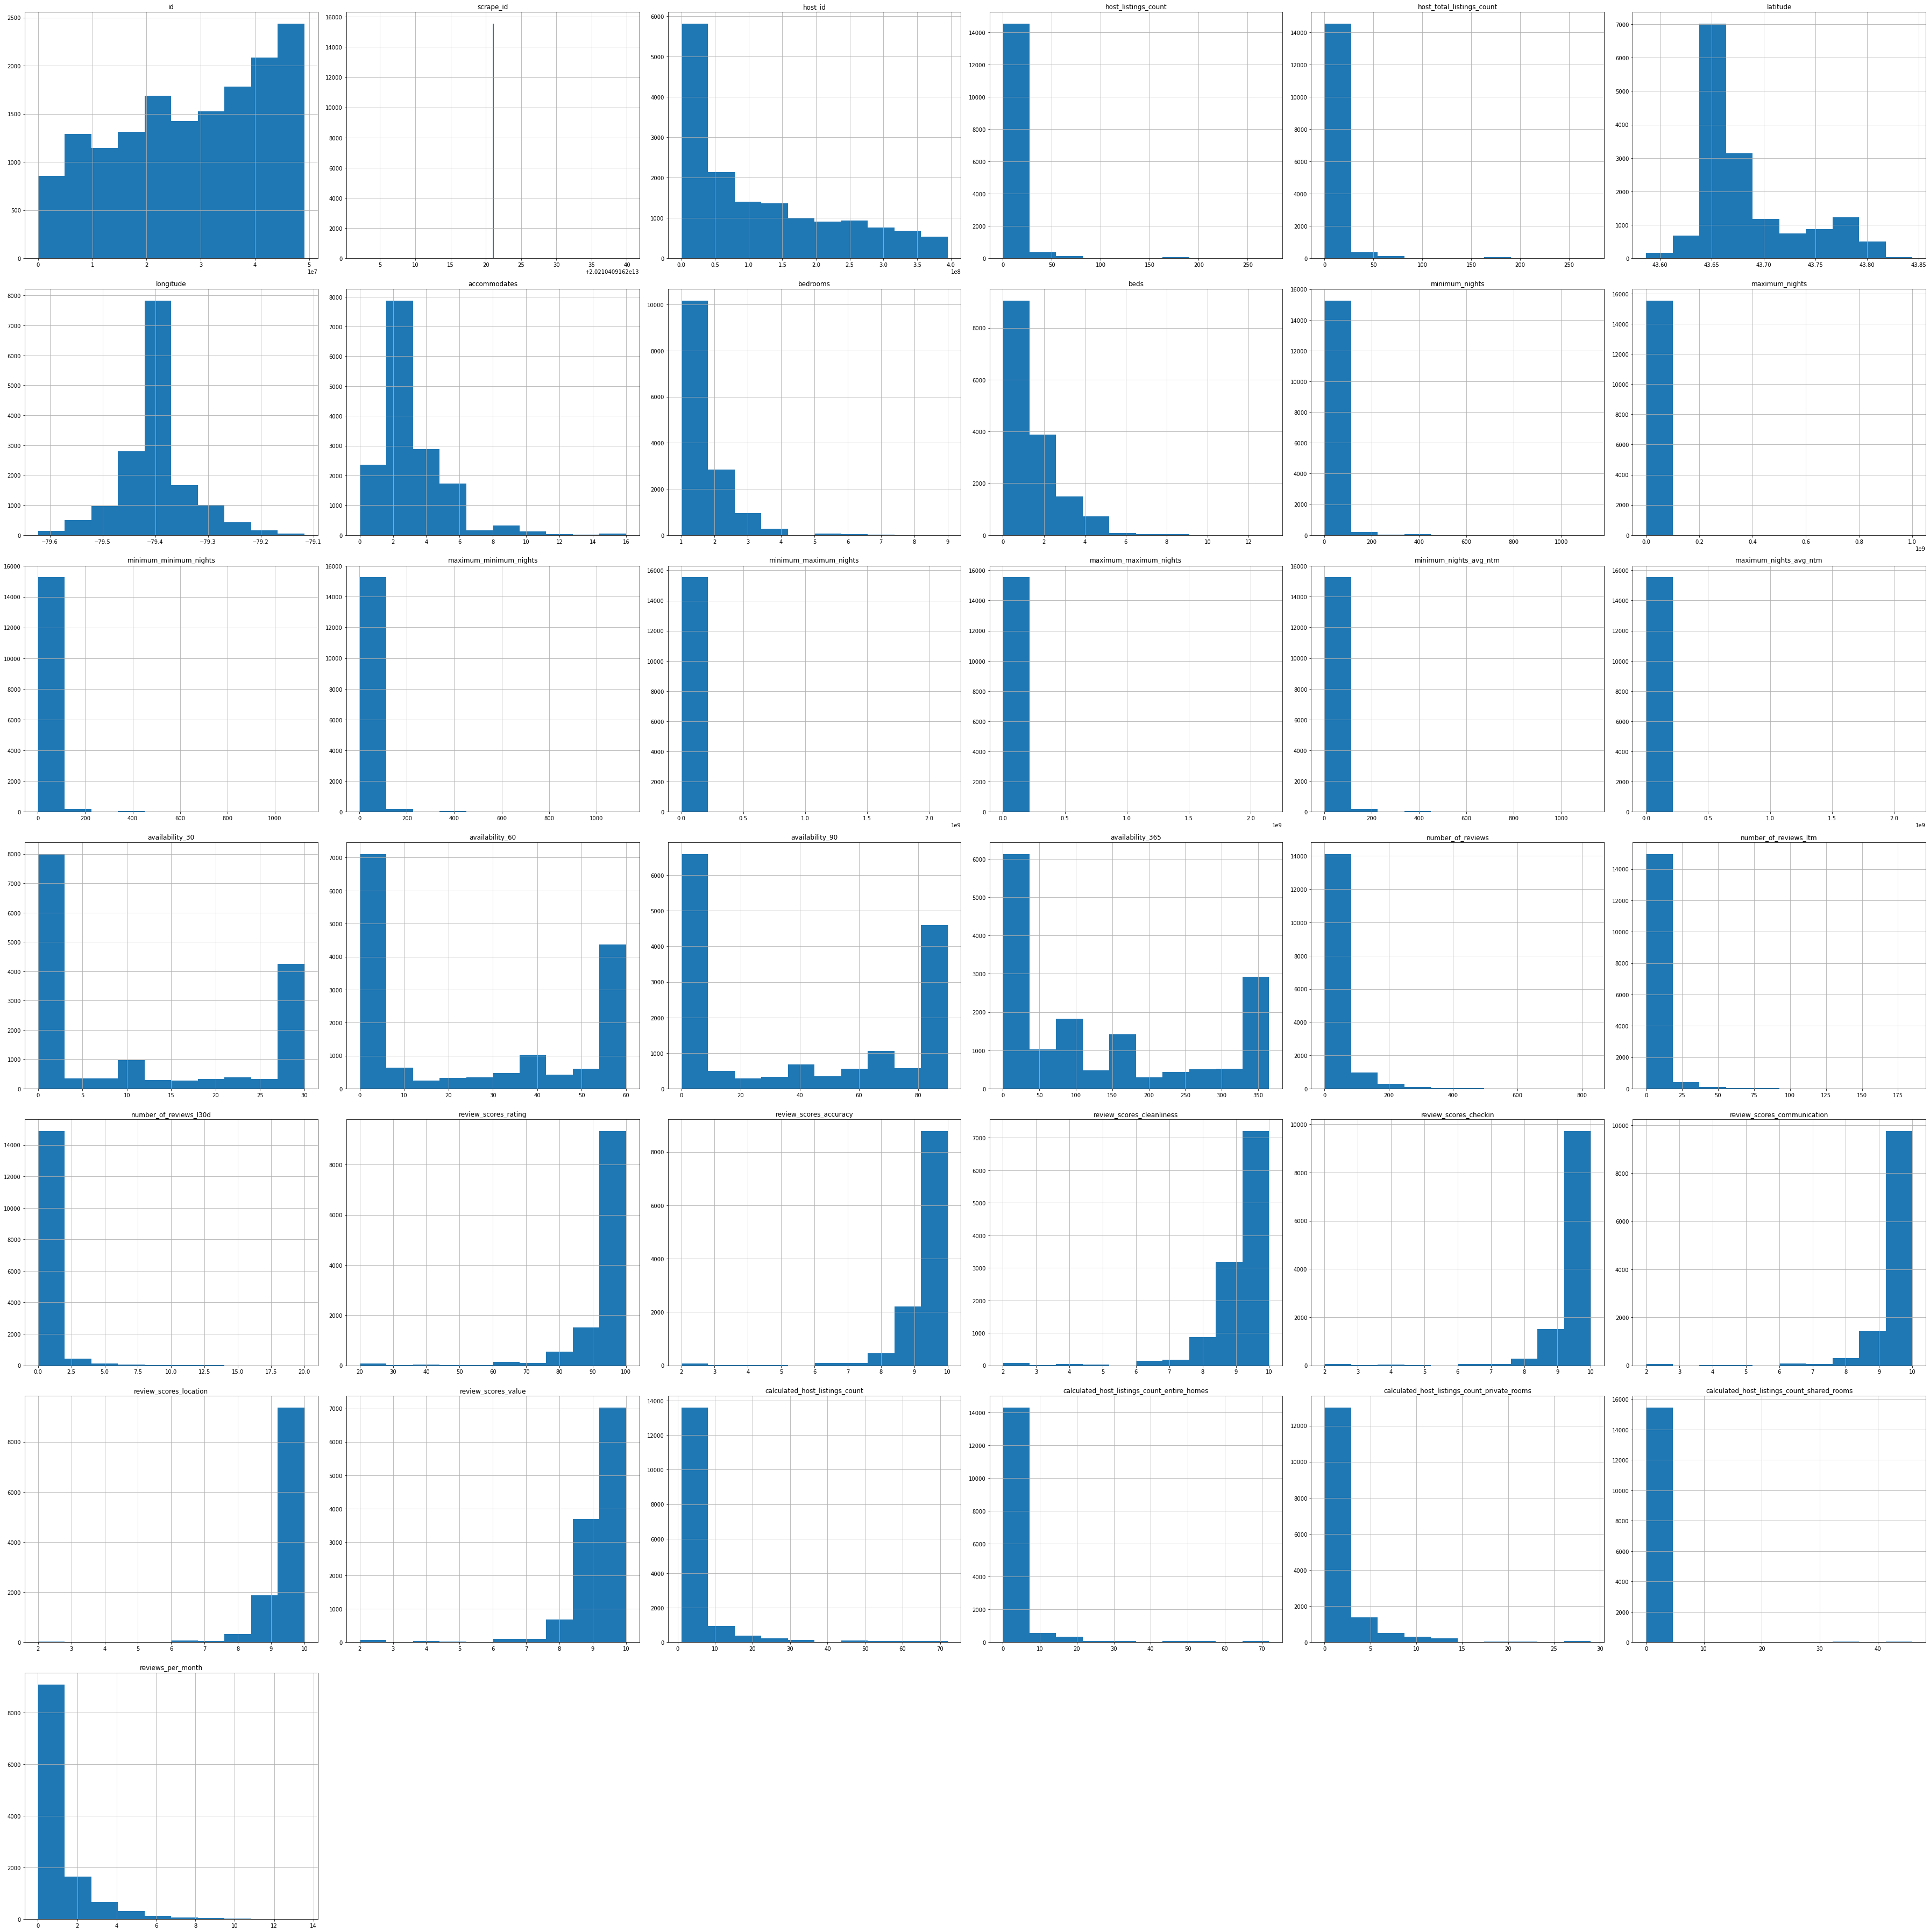

In [11]:
# Plotting the histogram plot for all numeric columns
df.hist(figsize = (50,50))
plt.tight_layout()

It is clear from the histogram that many columns have only one category of data. Hence, they can be delected from the 
dataframe. Columns such as 'id', 'scrape_id', 'host_id', 'minimum_minimum_nights', 'maximum_minimum_nights',
'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
'calculated_host_listings_count_shared_rooms' can be deleted.

In [12]:
# Deleting the single category columns
to_drop = ['id', 'scrape_id', 'host_id', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calculated_host_listings_count_shared_rooms' ]
df = df.drop(to_drop, axis = 1)

In [13]:
# Checking the data again
df.head()

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/1419,2021-04-10,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, British Columbia, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, Ontario, Canada",Little Portugal,43.64590,-79.42423,Entire house,Entire home/apt,10,3 baths,5.0,7.0,"[""Smoke alarm"", ""First aid kit"", ""Essentials"",...",$469.00,28,730,t,0,0,0,0,2021-04-10,7,0,0,2015-07-19,2017-12-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0.10
1,https://www.airbnb.com/rooms/8077,2021-04-11,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Waterfront Communities-The Island,43.64080,-79.37673,Private room in apartment,Private room,2,1.5 baths,1.0,1.0,"[""Smoke alarm"", ""Cable TV"", ""Shampoo"", ""Free p...",$94.00,180,365,t,30,60,90,365,2021-04-11,169,0,0,2009-08-20,2013-08-27,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2,1,1,1.19
2,https://www.airbnb.com/rooms/23691,2021-04-12,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,https://www.airbnb.com/users/show/93825,Yohan & Sarah,2010-03-15,"Toronto, Ontario, Canada",Welcome to our dwelling place! My wife and I l...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/93825/profile...,https://a0.muscache.com/im/users/93825/profile...,Fairbank,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,NaN,Briar Hill-Belgravia,43.69805,-79.45411,Private room in house,Private room,3,1 shared bath,1.0,1.0,"[""Lock on bedroom door"", ""Dedicated workspace""...",$72.00,28,28,t,30,60,90,365,2021-04-12,217,0,0,2010-05-31,2019-12-22,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,2,0,2,1.64
3,https://www.airbnb.com/rooms/27423,2021-04-12,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",NaN,https://a0.muscache.com/pictures/176936/b687ed...,https://www.airbnb.com/users/show/118124,Brent,2010-05-04,"Toronto, Ontario, Canada",I love to travel and meet new people from arou...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/f687f...,https://a0.muscache.com/im/pictures/user/f687f...,Greenwood-Coxwell

After looking at the data, it can be easily concluded that some of the columns have no significance on the price of the
listing. Thus, they can be dropped from the dataframe. 

In [14]:
# Dropping the columns 
to_drop= ['listing_url', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_url',
          'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate',
         'host_acceptance_rate', 'host_is_superhost','host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
         'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'calendar_last_scraped',
         'first_review', 'last_review', 'license']
df.drop(to_drop, axis=1, inplace=True)
df.head()

,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,1.0,1.0,Little Portugal,43.64590,-79.42423,Entire house,Entire home/apt,10,3 baths,5.0,7.0,"[""Smoke alarm"", ""First aid kit"", ""Essentials"",...",$469.00,28,730,t,0,0,0,0,7,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0.10
1,2.0,2.0,Waterfront Communities-The Island,43.64080,-79.37673,Private room in apartment,Private room,2,1.5 baths,1.0,1.0,"[""Smoke alarm"", ""Cable TV"", ""Shampoo"", ""Free p...",$94.00,180,365,t,30,60,90,365,169,0,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t,2,1,1,1.19
2,2.0,2.0,Briar Hill-Belgravia,43.69805,-79.45411,Private room in house,Private room,3,1 shared bath,1.0,1.0,"[""Lock on bedroom door"", ""Dedicated workspace""...",$72.00,28,28,t,30,60,90,365,217,0,0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,t,2,0,2,1.64
3,1.0,1.0,South Riverdale,43.66884,-79.32725,Entire apartment,Entire home/apt,1,1 bath,NaN,1.0,"[""Dedicated workspace"", ""Air conditioning"", ""H...",$45.00,365,365,t,0,0,0,42,26,0,0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0.20
4,3.0,3.0,Mount Pleasant West,43.69958,-79.38814,Entire apartment,Entire home/apt,1,1 bath,NaN,0.0,"[""Dedicated workspace"", ""Air conditioning"", ""H...",$50.00,30,365,t,4,34,64,339,7,0,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0.10


In [15]:
# Ceking the data again
df.shape

(15542, 35)

In [16]:
df.dtypes

host_listings_count                             float64
host_total_listings_count                       float64
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        float64
beds                                            float64
amenities                                        object
price                                            object
minimum_nights                                    int64
maximum_nights                                    int64
has_availability                                 object
availability_30                                   int64
availability_60                                 

In [17]:
df['price']

0        $469.00
1         $94.00
2         $72.00
3         $45.00
4         $50.00
          ...   
15537     $36.00
15538     $44.00
15539     $37.00
15540     $55.00
15541    $104.00
Name: price, Length: 15542, dtype: object

In [18]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df['price']

<ipython-input-18-a5f6e73a0e10>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)


0        469.0
1         94.0
2         72.0
3         45.0
4         50.0
         ...  
15537     36.0
15538     44.0
15539     37.0
15540     55.0
15541    104.0
Name: price, Length: 15542, dtype: float64

In [19]:
df.head()

,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,1.0,1.0,Little Portugal,43.64590,-79.42423,Entire house,Entire home/apt,10,3 baths,5.0,7.0,"[""Smoke alarm"", ""First aid kit"", ""Essentials"",...",469.0,28,730,t,0,0,0,0,7,0,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0.10
1,2.0,2.0,Waterfront Communities-The Island,43.64080,-79.37673,Private room in apartment,Private room,2,1.5 baths,1.0,1.0,"[""Smoke alarm"", ""Cable TV"", ""Shampoo"", ""Free p...",94.0,180,365,t,30,60,90,365,169,0,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t,2,1,1,1.19
2,2.0,2.0,Briar Hill-Belgravia,43.69805,-79.45411,Private room in house,Private room,3,1 shared bath,1.0,1.0,"[""Lock on bedroom door"", ""Dedicated workspace""...",72.0,28,28,t,30,60,90,365,217,0,0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,t,2,0,2,1.64
3,1.0,1.0,South Riverdale,43.66884,-79.32725,Entire apartment,Entire home/apt,1,1 bath,NaN,1.0,"[""Dedicated workspace"", ""Air conditioning"", ""H...",45.0,365,365,t,0,0,0,42,26,0,0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0.20
4,3.0,3.0,Mount Pleasant West,43.69958,-79.38814,Entire apartment,Entire home/apt,1,1 bath,NaN,0.0,"[""Dedicated workspace"", ""Air conditioning"", ""H...",50.0,30,365,t,4,34,64,339,7,0,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,1,1,0,0.10


In [20]:
df['price'].describe()

count    15542.000000
mean       144.959079
std        381.364914
min          0.000000
25%         60.000000
50%         96.000000
75%        150.000000
max      13000.000000
Name: price, dtype: float64

The price column contains $0 as the minimum price of the listings. So our data is biased.